In [1]:
import autograd.numpy as np
def sin(w):
    return np.sin(w)
w_val = 1.0
g_val = sin(w_val)
print (g_val)

0.841470984808


In [2]:
g = lambda w: np.sin(w)
w_val = 1.0
g_val = g(w_val)
print (g_val)

0.841470984808


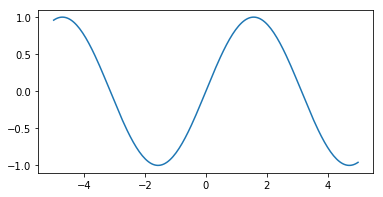

In [3]:
import autograd.numpy as np
import matplotlib.pyplot as plt
w_vals = np.linspace(-5,5,200)
#g = lambda w: np.sin(w)
g_vals = [g(v) for v in w_vals]
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(w_vals,g_vals)
plt.show()

In [4]:
from autograd import grad
nablg_g = grad(g)
w_val = 1.0
nablg_g(1.0)

0.54030230586813977

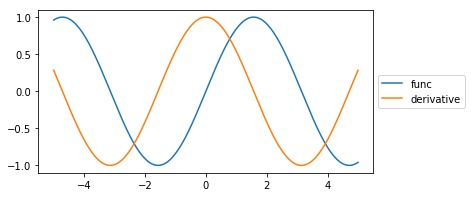

In [5]:
w_vals = np.linspace(-5,5,200)
g_vals = [g(v) for v in w_vals]
grad_vals = [nablg_g(v) for v in w_vals]
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(w_vals,g_vals)
ax.plot(w_vals,grad_vals)
ax.legend(['func','derivative'],loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

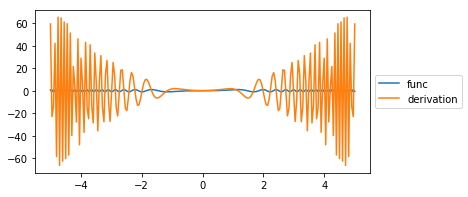

In [6]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def my_function(w):
	y = np.sin(w**3)
	return y
class GradViewr:
	"""docstring for GradViewr"""
	w_vals = np.linspace(-5,5,200)

	def __init__(self, arg):
		super(GradViewr, self).__init__()
		self.arg = arg
		# self.w_vals=1
		self.v_vals= self.arg(self.w_vals)
		self.nabla_g= grad(self.arg)
		self.grad_vals = self.nabla_g(self.w_vals)

	def plot_it(self):
		fig, ax = plt.subplots(1, 1, figsize=(6,3))
		ax.plot(self.w_vals,self.v_vals)
		ax.plot(self.w_vals,self.grad_vals)
		ax.legend(['func','derivation'],loc='center left', bbox_to_anchor=(1, 0.5))
		plt.show()
test =GradViewr(my_function)
test.plot_it()



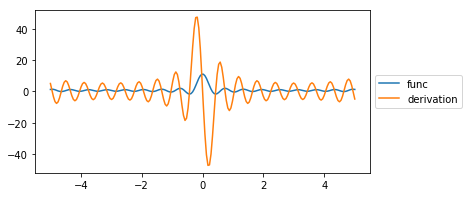

In [7]:
def extra_func(w):
    y = 0
    for i in range(11):
        y=np.cos(i*w)+y
    return y
test2 = GradViewr(extra_func)
test2.plot_it()

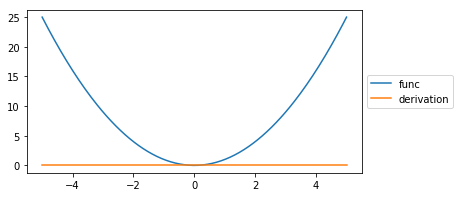

In [8]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def my_function(w):
	y = w**2
	return y
class GradViewr:
	"""docstring for GradViewr"""
	w_vals = np.linspace(-5,5,200)

	def __init__(self, arg):
		super(GradViewr, self).__init__()
		self.arg = arg
		# self.w_vals=1
		self.v_vals= self.arg(self.w_vals)
		self.nabla_g= grad(self.arg)
		self.grad_vals = self.nabla_g(self.w_vals)

	def plot_it(self):
		fig, ax = plt.subplots(1, 1, figsize=(6,3))
		ax.plot(self.w_vals,self.v_vals)
		ax.plot(self.w_vals,self.grad_vals)
		ax.legend(['func','derivation'],loc='center left', bbox_to_anchor=(1, 0.5))
		plt.show()
        
class OrderViewer(GradViewr):
	def compute_it(self,order):
		self.order = order
		for x in range(1,self.order):
			self.nabla_g = grad(self.nabla_g)
		self.grad_vals = self.nabla_g(self.w_vals)
test =OrderViewer(my_function)
test.compute_it(order=3)
test.plot_it()

In [9]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)
    weight_lst=[w]
    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            next_w = w
            weight_lst.append(next_w)
    return weight_lst

In [10]:
# create the input function
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

# run gradient descent
weight_history = gradient_descent(g = g,alpha = 10**-2,max_its = 2000,w = 2.0)
# x=len(weight_history)
# print (weight_history)

In [11]:
# cost function history plotter
def cost_history(weight_history,g):
    # loop over weight history and compute associated cost function history at each step
    g = [g(x) for x in weight_history]
#     x= len(weight_history)
    x_vals=np.linspace(0,2000,2001)

    # plot cost function history
    fig, ax=plt.subplots(1,1)
    ax.plot(g)
    
    plt.show()

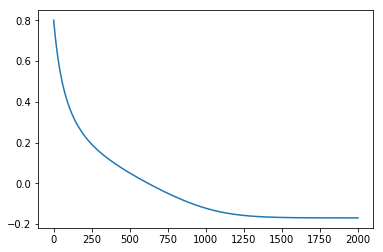

In [12]:
cost_history(weight_history,g)

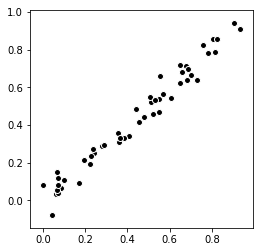

In [13]:
# data input
csvname = '2d_linregress_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
plt.show()

In [14]:
x = data[:,:-1]
y = data[:,-1]
# least squares cost function for linear regression
def least_squares(w):
    cost = 0
    for p in range(len(y)):
        # get pth input/output pair
        x_p = x[p]
        y_p = y[p]
        
        # form linear combination
        c_p = w[0] + w[1]*x_p
        
        # add least squares for this datapoint
        cost += (c_p - y_p)**2
        
    return cost
# try out least squares function
w = np.asarray([1.5,1.5])
least_squares(w)

array([ 149.60536284])

In [15]:
# run gradient descent
w = np.asarray([1.5,1.5])
weight_history1 = gradient_descent(g = least_squares,alpha = 0.0001,max_its = 500,w = w)
# weight_history2 = gradient_descent(g = least_squares,alpha = 0.007,max_its = 500,w = w)
# weight_history3 = gradient_descent(g = least_squares,alpha = 0.0001,max_its = 500,w = w)
# cost_history(weight_history1,least_squares)
# cost_history(weight_history2,least_squares)
# cost_history(weight_history3,least_squares)

In [16]:
# MSE history plotter
def MSE(weight_history,g):
    # loop over weight history and compute the MSE at each step o gradient descent
    m = len(y)
    g = [g(w)/m for w in weight_history]
#     g = g/m
    print(m)    
    # plot cost function history
    fig, ax=plt.subplots(1,1)
    ax.plot(g)
    
    plt.show()

50


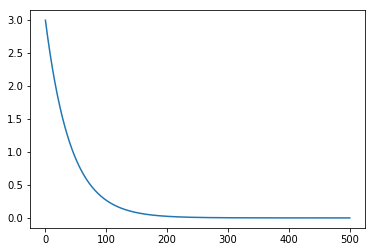

In [17]:
MSE(weight_history1, least_squares)
# MSE(weight_history2, least_squares)
# MSE(weight_history3, least_squares)

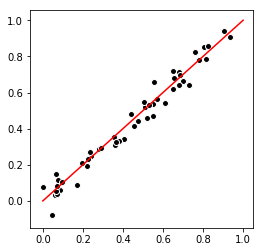

In [18]:
# our initial weights
w = np.asarray([0.0,1.0])

# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(0,1,200)
y_vals = w[0] + w[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()

In [19]:
# # load in dataset
data = np.loadtxt('highdim_linregress_data.csv',delimiter = ',')

# # form the input/output data vectors
x = data[:,:-1]
y = data[:,-1]
# # least squares cost function for linear regression
def least_squares(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        a_p = w[0] + sum([a*b for a,b in zip(w[1:],x_p)])
        cost +=(a_p - y_p)**2
        
    return cost

In [20]:
# produce input and input into Least Squares cost function
w = np.ones((11,1))
print (least_squares(w))

[ 7917.97952037]


In [23]:
# run gradient descent
w = np.random.randn(np.shape(x)[1]+1,1)
weight_history = gradient_descent(g = least_squares,alpha = 0.0002,max_its = 100,w = w)

100


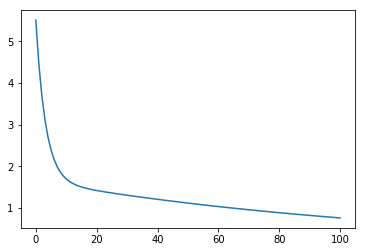

In [24]:
# use cost_history plotter
MSE(weight_history,least_squares)